In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stat
import pylab 

In [34]:
#import datasets 
train_dist = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/test_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_dist = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/test_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_df = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/dataset_test_without_rev_features.csv").drop(["Unnamed: 0"], axis = 1)
rev = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/revenue_labels.csv").drop(["Unnamed: 0"], axis = 1)
rev2 = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/revenue_labels.csv").drop(["Unnamed: 0"], axis = 1)
test_set = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/test_set_feat.csv")
train_set = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/train_set_feat.csv")
store_impuded = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/stores_gk_impuded.csv")
test_impuded = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/stores_test_impuded.csv")

store_impuded

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,grunnkrets_name,district_name,municipality_name,area_km2
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Bragernes sentrum 3,Bragernes sentrum,Drammen,0.155779
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Sentrum 3 /rode 6,Sentrum 3,Oslo,0.264278
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Sydsiden 2,Hønefoss,Ringerike,0.160152
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Sentrum 1,Sentrum,Bodø,0.095029
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,0.251070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,898186512-971708093-15710,2016,JOKER VANNVÅG,2.8.1.0,Grocery stores,19360207,NaN,70.088196,19.993661,JOKER,NaN,16.842,Nord-Lenangen vest,Lenangen,Lyngen,0.848894
12855,996275094-971758961-1683,2016,NÆRBUTIKKEN RØDØY,2.8.1.0,Grocery stores,18360112,NaN,66.663386,13.080629,NÆRBUTIKKEN,NaN,8.517,Selsøyvik,Rødøy,Rødøy,1.236299
12856,952160427-971791772-29954,2016,JOKER WESTGAARD,2.8.1.0,Grocery stores,8150103,OLE HALVORSENS VEI 914,58.792096,9.372469,JOKER,NaN,20.777,Rørvik,Rørvik/Berg,Kragerø,0.504199
12857,915071902-913605128-691557,2016,ANDERSENS HOBBY AS,2.9.3.0,Home textile shops,9061201,NEDRE GARTAVEI 48,58.517974,8.883972,NaN,NaN,0.475,Kongshamn,Tromøy øst,Arendal,0.852702


In [35]:
#Check wether or not a feature is guassian or normal distributed, using Q-Q plot 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])



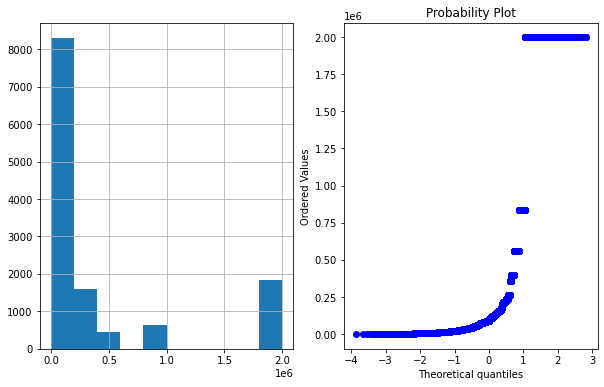

In [36]:
set = train_set
feature = "remainder__municipality_name_population_count"
plot_data(set, feature)

### Log Transform 

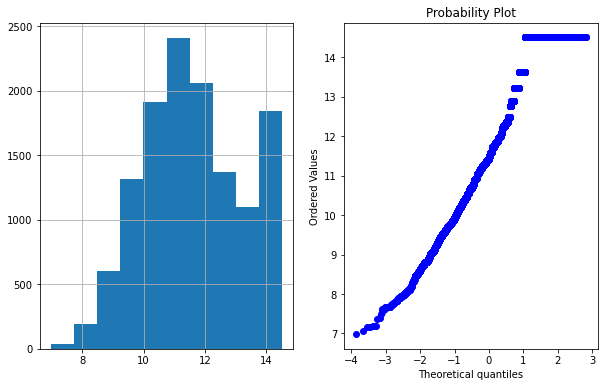

In [37]:
#Taking log(1+x)
set["log_rev"] = np.log(1+set[feature])
plot_data(set, "log_rev")

### Reciprocal Trnasformation

In [38]:
### Taking 1/(1+x)
set["reciprocal_set"] = 1 / (1+set.grunnkrets_id)
plot_data(set, "reciprocal_set")

AttributeError: 'DataFrame' object has no attribute 'grunnkrets_id'

### Square root transformation 

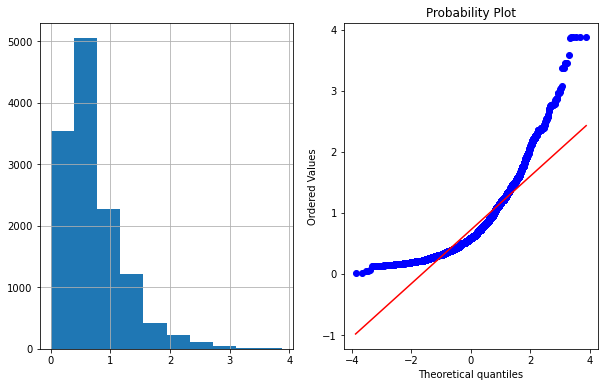

In [ ]:
set["squared_set"] = set.area_km2**(1/2)
plot_data(set, "squared_set")

### Exponential Transdormation

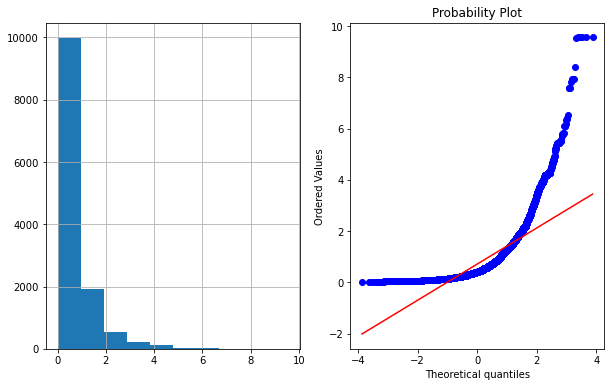

In [ ]:
set["exp_set"] = set.area_km2**(1/1.2)
plot_data(set,"exp_set")

### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

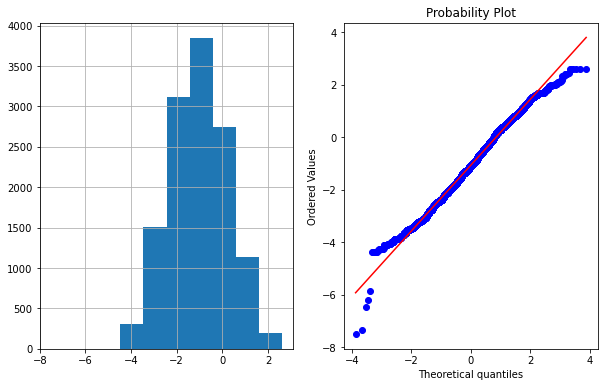

In [ ]:
set["boxcox_set"], parameters = stat.boxcox(0.001+ set[feature])

plot_data(set, "boxcox_set")

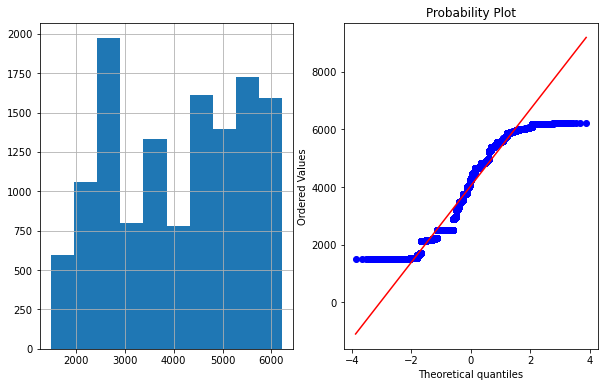

In [ ]:
set["yeo_johnson_set"], parameters = stat.yeojohnson(set["grunnkrets_id"])
plot_data(set, "yeo_johnson_set")

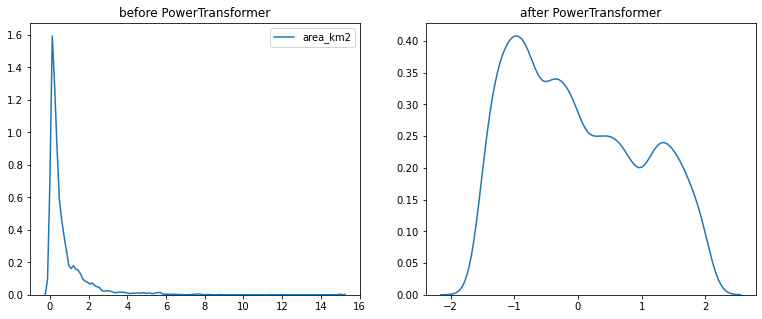

In [ ]:
plots(set, feature, PowerTransformer())

Text(0.5, 1.0, 'Transformed revenue')

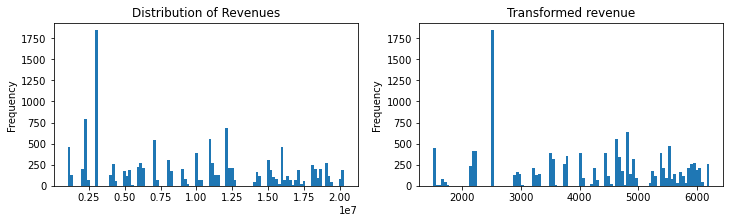

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
set.grunnkrets_id.plot.hist(bins=100, ax=ax1)
ax1.set_title('Distribution of Revenues');
set.yeo_johnson_set.plot.hist(bins=100, ax = ax2)
ax2.set_title("Transformed revenue")

In [ ]:
rev

,revenue,log_rev,reciprocal_rev,squared_rev,exp_rev,boxcox_rev,yeo_johnson_rev
0,17.998,2.944334,0.052637,4.242405,11.117835,3.676042,2.019996
1,23.828,3.211972,0.040277,4.881393,14.046657,4.132067,2.135063
2,16.099,2.839020,0.058483,4.012356,10.131313,3.500447,1.972350
3,9.296,2.331755,0.097125,3.048934,6.410818,2.679960,1.722550
4,4.528,1.709826,0.180897,2.127910,3.520373,1.708970,1.364838
...,...,...,...,...,...,...,...
12854,0.088,0.084341,0.919118,0.296648,0.131948,-2.005420,0.083373
12855,1.816,1.035317,0.355114,1.347590,1.644106,0.626691,0.901289
12856,38.225,3.669314,0.025494,6.182637,20.826818,4.948084,2.313157
12857,3.642,1.535145,0.215424,1.908402,2.936184,1.436448,1.252893


In [ ]:
pt = PowerTransformer()
rev_t1 = pt.fit_transform(rev[['revenue']])
rev_t2 = pt.inverse_transform(rev_t1)

rev["yeo_rev_test"] = rev_t1



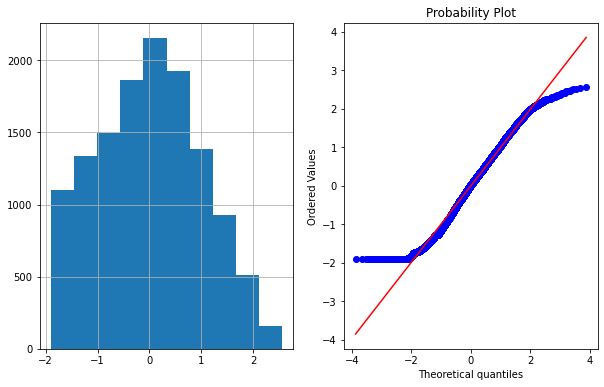

In [ ]:
plot_data(rev, "yeo_rev_test")